In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import csv

forders = os.listdir('/content/drive/MyDrive/네이버리뷰크롤링')

name = '거리측정기'
df = pd.read_csv('/content/drive/MyDrive/네이버리뷰크롤링/naver{}1.csv'.format(name))
for i in range(2, 4):
  new = pd.read_csv('/content/drive/MyDrive/네이버리뷰크롤링/naver{}{}.csv'.format(name, i))
  df = pd.concat([new, df])

output = df[['category', 'product_name', 'content', 'star_rating']]
print(output)


     category                                       product_name  \
0       거리측정기                            캐디톡 레이저 골프거리측정기 캐디톡 미니미   
1       거리측정기                            캐디톡 레이저 골프거리측정기 캐디톡 미니미   
2       거리측정기                            캐디톡 레이저 골프거리측정기 캐디톡 미니미   
3       거리측정기                            캐디톡 레이저 골프거리측정기 캐디톡 미니미   
4       거리측정기                            캐디톡 레이저 골프거리측정기 캐디톡 미니미   
...       ...                                                ...   
3724    거리측정기  [본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림   
3725    거리측정기  [본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림   
3726    거리측정기  [본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림   
3727    거리측정기  [본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림   
3728    거리측정기  [본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림   

                                                content  star_rating  
0          해당 상품 2번째 선물 중인데 가격대도 좋고  초소형이라 매우 좋다고 하십니다.            5  
1         캐디톡 미니미 구입후 타수가 5타는 줄어든것 같아요 아주

In [3]:
#output.to_csv("navertotal.csv", index = False)

In [4]:
unique_values = output['star_rating'].unique()
print(unique_values)

[5 4 3 2 1]


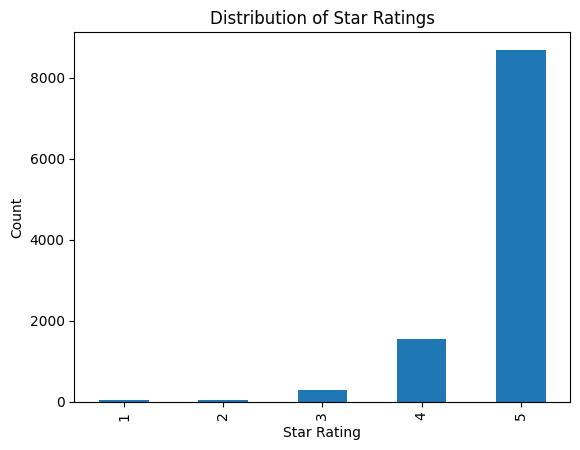

In [5]:
#print(output['star_rating'].dtypes)
import matplotlib.pyplot as plt
output['star_rating'].value_counts().sort_index().plot(kind='bar')

# Setting the labels and title for the plot
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')

# Displaying the plot
plt.show()

In [22]:
#긍,부정 비율
import numpy as np
output.loc[output['star_rating'] > 3, 'label'] = 1
output.loc[output['star_rating'] <= 3, 'label'] = 0
df = output[['content', 'label']]
print(df)

                                                content  label
0          해당 상품 2번째 선물 중인데 가격대도 좋고  초소형이라 매우 좋다고 하십니다.      1
1         캐디톡 미니미 구입후 타수가 5타는 줄어든것 같아요 아주 사용하기 편리합니다!^^      1
2                               작아서꺼내기도편리하고넘좋아요~적극추천합니다      1
3     아빠 선물로 사드렸는데 너무 좋아하세요ㅎㅎ 사이즈도 작고 무겁지 않아서 그립감도 괜...      1
4            작아서사용하기편리할듯하네요~이뻐요~지인추천이라구매했는데대만족입니다~번창하세요      1
...                                                 ...    ...
3724                          가성비 굿 입니다~ 절대 후회하지 않습니다^^      1
3725                            빠른배송  좋은 상품  넘 넘 좋아요...      1
3726                              배송도 빠르고 디자인 과 성능 좋았어요      1
3727                                      가격대비만족하고매우좋아묘      1
3728                                         잘보이고 좋습니다.      1

[10617 rows x 2 columns]


In [89]:
df.to_csv("df_final.csv", index = False)

In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.9 MB/s eta 0:00:00


In [9]:
import re
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
!pip install git+https://github.com/juyeon6273/PyKoSpacing.git

  Cloning https://github.com/juyeon6273/PyKoSpacing.git to /tmp/pip-req-build-u6zeyyg4
  Running command git clone --filter=blob:none --quiet https://github.com/juyeon6273/PyKoSpacing.git /tmp/pip-req-build-u6zeyyg4
  Resolved https://github.com/juyeon6273/PyKoSpacing.git to commit ab7a1c1254b148c0b675bdd3442f900474bc319f
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268679 sha256=10955ee93d9886cafe97f366fb3c7fe4e6b166f40425defecbef5dd80b0db4d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wn53ndfm/wheels/9b/12/19/59ad46f816fc8dc61ffe797793d9eedfce4db63e973c31c374
Successfully built pykospacing


In [24]:
concatenated_content = df['content'].str.cat(sep=' ')
print(df)

                                                content  label
0          해당 상품 2번째 선물 중인데 가격대도 좋고  초소형이라 매우 좋다고 하십니다.      1
1         캐디톡 미니미 구입후 타수가 5타는 줄어든것 같아요 아주 사용하기 편리합니다!^^      1
2                               작아서꺼내기도편리하고넘좋아요~적극추천합니다      1
3     아빠 선물로 사드렸는데 너무 좋아하세요ㅎㅎ 사이즈도 작고 무겁지 않아서 그립감도 괜...      1
4            작아서사용하기편리할듯하네요~이뻐요~지인추천이라구매했는데대만족입니다~번창하세요      1
...                                                 ...    ...
3724                          가성비 굿 입니다~ 절대 후회하지 않습니다^^      1
3725                            빠른배송  좋은 상품  넘 넘 좋아요...      1
3726                              배송도 빠르고 디자인 과 성능 좋았어요      1
3727                                      가격대비만족하고매우좋아묘      1
3728                                         잘보이고 좋습니다.      1

[10617 rows x 2 columns]


In [30]:
import re

def replace(text):
    return re.sub('[^가-힣0-9\s]', ' ', text)

df['content'] = df['content'].apply(replace)
print(df)

                                                content  label
0          해당 상품 2번째 선물 중인데 가격대도 좋고  초소형이라 매우 좋다고 하십니다       1
1         캐디톡 미니미 구입후 타수가 5타는 줄어든것 같아요 아주 사용하기 편리합니다         1
2                               작아서꺼내기도편리하고넘좋아요 적극추천합니다      1
3     아빠 선물로 사드렸는데 너무 좋아하세요   사이즈도 작고 무겁지 않아서 그립감도 괜...      1
4            작아서사용하기편리할듯하네요 이뻐요 지인추천이라구매했는데대만족입니다 번창하세요      1
...                                                 ...    ...
3724                          가성비 굿 입니다  절대 후회하지 않습니다        1
3725                            빠른배송  좋은 상품  넘 넘 좋아요         1
3726                              배송도 빠르고 디자인 과 성능 좋았어요      1
3727                                      가격대비만족하고매우좋아묘      1
3728                                         잘보이고 좋습니다       1

[10617 rows x 2 columns]


<ipython-input-30-0abdd42e8998>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(replace)


In [31]:
def replace2(text):
    return re.sub('[^,.?!\w\s]', ' ', text)

df['content'] = df['content'].apply(replace2)
print(df)

                                                content  label
0          해당 상품 2번째 선물 중인데 가격대도 좋고  초소형이라 매우 좋다고 하십니다       1
1         캐디톡 미니미 구입후 타수가 5타는 줄어든것 같아요 아주 사용하기 편리합니다         1
2                               작아서꺼내기도편리하고넘좋아요 적극추천합니다      1
3     아빠 선물로 사드렸는데 너무 좋아하세요   사이즈도 작고 무겁지 않아서 그립감도 괜...      1
4            작아서사용하기편리할듯하네요 이뻐요 지인추천이라구매했는데대만족입니다 번창하세요      1
...                                                 ...    ...
3724                          가성비 굿 입니다  절대 후회하지 않습니다        1
3725                            빠른배송  좋은 상품  넘 넘 좋아요         1
3726                              배송도 빠르고 디자인 과 성능 좋았어요      1
3727                                      가격대비만족하고매우좋아묘      1
3728                                         잘보이고 좋습니다       1

[10617 rows x 2 columns]


<ipython-input-31-e641483a295f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(replace2)


In [32]:
#띄어쓰기
from pykospacing import Spacing
spacing = Spacing()
df['content'] = df['content'].apply(spacing)

<ipython-input-32-61cb544dccb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(spacing)


In [33]:
#정규표현식

#문장 맨 앞 텍스트 제외
# df['content'] = df['content'].apply(lambda x: re.sub(r"^\s+", '', x))

# #문장 맨 뒤 텍스트 제외
# df['content'] = df['content'].apply(lambda x: re.sub(r'\s+$', '', x))

# #띄어쓰기 2개 이상일 경우 1개로
# df['content'] = df['content'].apply(lambda x: re.sub(r'\s+', ' ', x))

# print(df)

df.loc[:, 'content'] = df['content'].apply(lambda x: re.sub(r"^\s+", '', x))
df.loc[:, 'content'] = df['content'].apply(lambda x: re.sub(r'\s+$', '', x))
df.loc[:, 'content'] = df['content'].apply(lambda x: re.sub(r'\s+', ' ', x))
print(df)

                                                content  label
0            해당 상품 2번째 선물 중인데 가격대도 좋고 초소형이라 매우 좋다고 하십니다      1
1       캐디톡 미니 미 구입 후 타수가 5 타는 줄어든 것 같아 요 아주 사용하기 편리합니다      1
2                          작아서 꺼내기도 편리하고 넘 좋아요 적극 추천합니다      1
3     아빠 선물로 사드렸는데 너무 좋아하세요 사이즈도 작고 무겁지 않아서 그립감도 괜찮고...      1
4     작아서 사용하기 편리할 듯하네요 이 뻐요 지인 추천이라 구매했는데 대만족입니다 번창하세요      1
...                                                 ...    ...
3724                             가성비 굿 입니다 절대 후회하지 않습니다      1
3725                                빠른 배송 좋은 상품 넘 넘 좋아요      1
3726                              배송도 빠르고 디자인 과 성능 좋았어요      1
3727                                  가격 대비 만족하고 매우 좋아묘      1
3728                                         잘 보이고 좋습니다      1

[10617 rows x 2 columns]


<ipython-input-33-c8c1be23d411>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: re.sub(r"^\s+", '', x))
<ipython-input-33-c8c1be23d411>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: re.sub(r'\s+$', '', x))
<ipython-input-33-c8c1be23d411>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [34]:
#맞춤법
!pip install git+https://github.com/juyeon6273/py-hanspell.git

  Cloning https://github.com/juyeon6273/py-hanspell.git to /tmp/pip-req-build-ylwe_16z
  Running command git clone --filter=blob:none --quiet https://github.com/juyeon6273/py-hanspell.git /tmp/pip-req-build-ylwe_16z
  Resolved https://github.com/juyeon6273/py-hanspell.git to commit 029be2f46b433809d0e5db4a480b0a7cb7ad3284
  Preparing metadata (setup.py) ... done


In [35]:
from hanspell import spell_checker
df['content'] = df['content'].apply(lambda x: spell_checker.check(x).checked)

#테스트
test_result = spell_checker.check('아버지가방에 들어가신다. 아버지 가방에 들어가신다.')
test_result.as_dict()['checked']

<ipython-input-35-72cef635bd9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: spell_checker.check(x).checked)


'아버지가 방에 들어가신다. 아버지 가방에 들어가신다.'

In [58]:
print(df)

                                                content  label
0     [해당, 상품, 2, 번째, 선물, 중, 인데, 가격, 대도, 좋고, 초소, 형, ...      1
1     [캐디, 톡, 미니, 미, 구입, 후, 타수, 가, 5, 타는, 줄어든, 것, 같아...      1
2               [작아서, 꺼내기도, 편리하고, 너무, 좋아요, 적극, 추천, 합니다]      1
3     [아빠, 선물, 로, 사, 드렸는데, 너무, 좋아하세요, 사이즈, 도, 작고, 무겁...      1
4     [작아서, 사용, 하기, 편리할, 듯, 하네요, 이, 뻐, 요, 지인, 추천, 이라...      1
...                                                 ...    ...
3724                  [가성, 비, 굿, 입니다, 절대, 후회, 하지, 않습니다]      1
3725                      [빠른, 배송, 좋은, 상품, 너무, 너무, 좋아요]      1
3726                     [배송, 도, 빠르고, 디자인, 과, 성능, 좋았어요]      1
3727                          [가격, 대비, 만족하고, 매우, 좋아, 묘]      1
3728                                   [잘, 보이, 고, 좋습니다]      1

[10617 rows x 2 columns]


In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [37]:
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 32.1 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=b22f5398e3a553d30994f104665714884d26680d82471434bf4d0a17e7ad83c4
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [38]:
# KoNLPy의 Okt, Mecab
from konlpy.tag import Okt, Mecab
okt = Okt()
#mecab = Mecab()

In [60]:
print(df)

                                                content  label
0     [해당, 상품, 2, 번째, 선물, 중, 인데, 가격, 대도, 좋고, 초소, 형, ...      1
1     [캐디, 톡, 미니, 미, 구입, 후, 타수, 가, 5, 타는, 줄어든, 것, 같아...      1
2               [작아서, 꺼내기도, 편리하고, 너무, 좋아요, 적극, 추천, 합니다]      1
3     [아빠, 선물, 로, 사, 드렸는데, 너무, 좋아하세요, 사이즈, 도, 작고, 무겁...      1
4     [작아서, 사용, 하기, 편리할, 듯, 하네요, 이, 뻐, 요, 지인, 추천, 이라...      1
...                                                 ...    ...
3724                  [가성, 비, 굿, 입니다, 절대, 후회, 하지, 않습니다]      1
3725                      [빠른, 배송, 좋은, 상품, 너무, 너무, 좋아요]      1
3726                     [배송, 도, 빠르고, 디자인, 과, 성능, 좋았어요]      1
3727                          [가격, 대비, 만족하고, 매우, 좋아, 묘]      1
3728                                   [잘, 보이, 고, 좋습니다]      1

[10617 rows x 2 columns]


In [61]:
#품사태깅

df['content'] = df['content'].apply(lambda x: ' '.join(x))  # Convert the list of words to a string
df['content'] = df['content'].apply(lambda x: okt.pos(x))
print(df)

<ipython-input-61-38dd53813185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: ' '.join(x))  # Convert the list of words to a string


                                                content  label
0     [(해당, Noun), (상품, Noun), (2, Number), (번째, Suf...      1
1     [(캐디, Noun), (톡, Noun), (미니, Noun), (미, Adject...      1
2     [(작아서, Adjective), (꺼내기도, Verb), (편리하고, Adject...      1
3     [(아빠, Noun), (선물, Noun), (로, Noun), (사, Noun),...      1
4     [(작아서, Adjective), (사용, Noun), (하기, Verb), (편리...      1
...                                                 ...    ...
3724  [(가성, Noun), (비, Noun), (굿, Noun), (입니다, Adjec...      1
3725  [(빠른, Adjective), (배송, Noun), (좋은, Adjective),...      1
3726  [(배송, Noun), (도, Noun), (빠르고, Adjective), (디자인...      1
3727  [(가격, Noun), (대비, Noun), (만족하고, Adjective), (매...      1
3728  [(잘, Verb), (보이, Noun), (고, Noun), (좋습니다, Adje...      1

[10617 rows x 2 columns]


<ipython-input-61-38dd53813185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: okt.pos(x))


In [65]:
from konlpy.tag import Okt

okt = Okt()

stop_words = ". 을 를 하 아 ~ , 게 때 는 !"
stop_words = set(stop_words.split(' '))

# 전처리
df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])

# 추가 불용어
with open("/content/drive/MyDrive/stopword.txt", 'r') as f:
    stopwords = [line.strip() for line in f.readlines()]

print('불용어 단어 리스트:', ' '.join(stopwords))

df['content'] = df['content'].apply(lambda x: [token for token in x if token not in stopwords])


print(df['content'])


<ipython-input-65-b9314af1785f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])


불용어 단어 리스트: 않다 되어다 되다 하다 어떻다 이렇다 이다 어제 매일 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 

<ipython-input-65-b9314af1785f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: [token for token in x if token not in stopwords])


In [74]:
#명사, 형용사 추출
# nouns_and_adjectives = [word for word, pos in Okt.pos(concatenated_content, norm=True) if pos in ['Noun', 'Adjective']]
# print(nouns_and_adjectives)


df['content'] = df['content'].apply(lambda x: [word for word, pos in x if pos in ['Noun', 'Adjective']])

ValueError: ignored

In [75]:
print(df)

                                                content  label
0           [해당, 상품, 선물, 중, 가격, 대도, 좋고, 초소, 형, 매우, 좋다고]      1
1     [캐디, 톡, 미니, 미, 구입, 후, 타수, 것, 같아, 요, 아주, 사용, 편리...      1
2                              [작아서, 편리하고, 좋아요, 적극, 추천]      1
3     [아빠, 선물, 로, 사, 좋아하세요, 사이즈, 도, 작고, 무겁지, 괜찮고, 측정...      1
4     [작아서, 사용, 편리할, 듯, 이, 뻐, 요, 지인, 추천, 구매, 만족, 입니다...      1
...                                                 ...    ...
3724                            [가성, 비, 굿, 입니다, 절대, 후회]      1
3725                              [빠른, 배송, 좋은, 상품, 좋아요]      1
3726                     [배송, 도, 빠르고, 디자인, 과, 성능, 좋았어요]      1
3727                          [가격, 대비, 만족하고, 매우, 좋아, 묘]      1
3728                                      [보이, 고, 좋습니다]      1

[10617 rows x 2 columns]


In [77]:
# 긍,부정 비율
# import numpy as np
# df['label'] = np.select([df.star_rating > 3], [1], default=0)

positive_reviews = np.hstack(df[df['label']==1]['content'].values)
negative_reviews = np.hstack(df[df['label']==0]['content'].values)

In [87]:
print(positive_reviews)

['해당' '상품' '선물' ... '보이' '고' '좋습니다']


In [88]:
print(negative_reviews)

['상품' '성은' '좋습니다' ... '손' '쏙' '좋아요']


In [78]:
from collections import Counter
positive_reviews_word_count = Counter(positive_reviews)
#print(positive_reviews_word_count.most_common(20))
negative_reviews_word_count = Counter(negative_reviews)
#print(negative_reviews_word_count.most_common(20))

In [81]:
!pip install konlpy wordcloud
from wordcloud import WordCloud

!pip install konlpy wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

In [83]:
!pip install matplotlib-venn-wordcloud

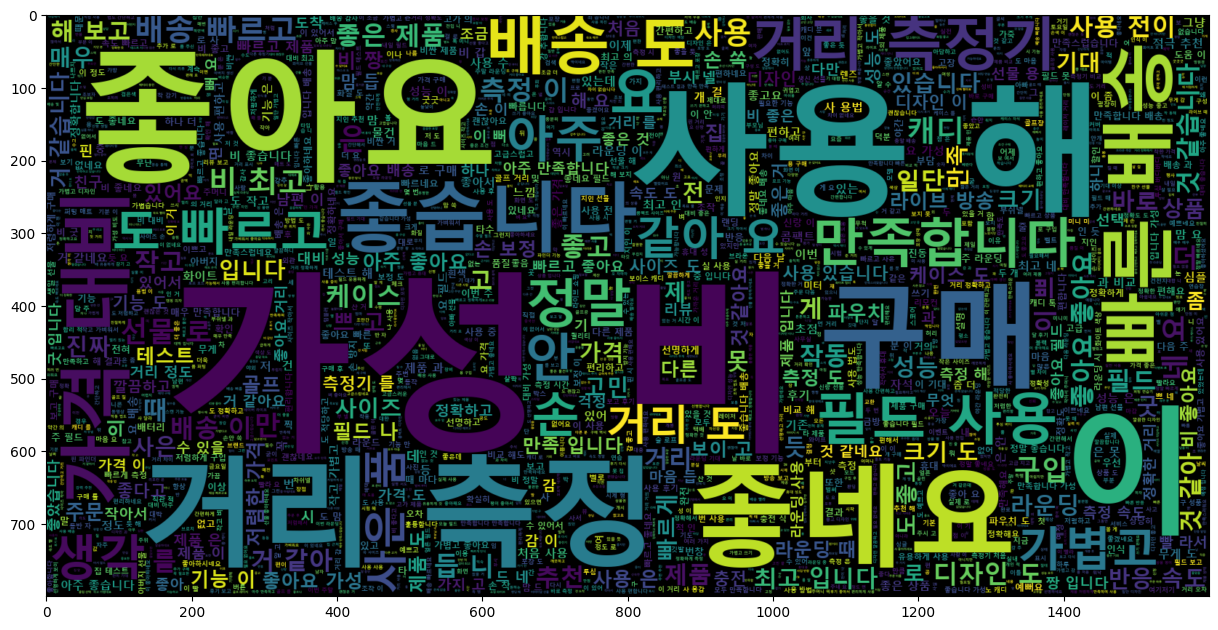

In [102]:
fontpath = '/content/drive/MyDrive/malgunbd668.ttf'
plt.figure(figsize = (15,15))

temp_data = ' '.join(np.concatenate(df[df['label']==1].content.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

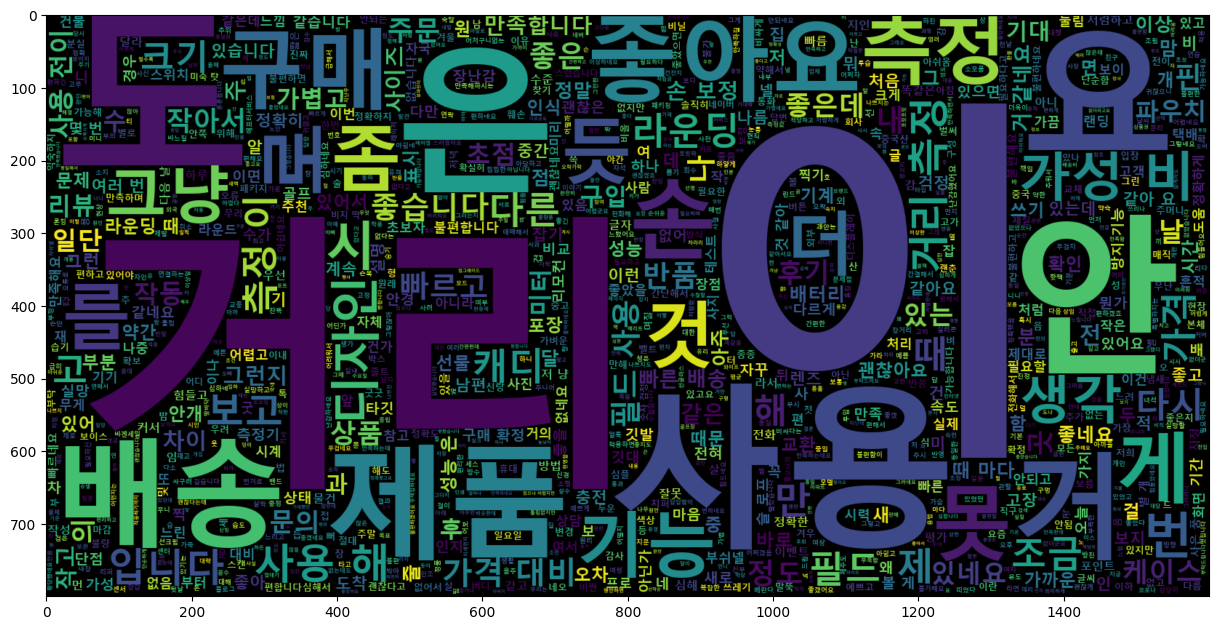

In [103]:
# 부정 리뷰의 워드 클라우드
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df[df['label']==0].content.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')